## Homework 6 - Arrays and Plotting

Note: this homework assumes you also worked in the in-class work for this week! Work on that first!

Our in-class work involved behavioral data from an experiment in our own lab. Now we will work with data from an eyetracker. This is a special camera that can tell where you're looking on a computer screen. This is the eyetracking data from the same subjects in the same experiment. 

### Problem 1

Time for a little practice with arrays and matricies. 

a. Make a numpy array that has the numbers 1 through 10 using the `arange` function. Make sure you rename numpy to `np`

b. Now make a matrix that looks like this and call it `mymat`. Print it out. 

|7|8|9|
|---|---|---|
|4|5|6|
|1|2|3|
|0|0|1|



c. Show me how to get the number of rows and columns of `mymat`.

d. How do I figure out the data type of each element in `mymat`. 

### Problem 2

a. Create an array called `arr` that contains the numbers 1 through 30. Then index the following from it: 

* The first 10 elements
* The last 10 elements
* The even numbers
* The numbers 12 through 21



b. Now make a matrix called `mat` that contains the numbers 1 through 225. It should have 15 rows and 15 columns, and the numbers should count across the rows from left to right. Hint: check out the `reshape` function. Print it when you're done. 

c. Now index the following from `mat`:

* The entire first row
* The entire last column
* The odd elements from each row
* The exact middle element
* Rows 3 through 6, columns 11 through 14

d. Copy and paste your code from above, and for each one, tell me the shape of each result. What do you notice? Descibe in the comments.  

e. Change `mat` so every element that's greater than `150` is equal to `0`. 

f. Make a matrix `zmat` that is a 10 x 10 matrix of zeros and print it. 

g. Let's make a "square" of ones in the center of this matrix. Make a square 4 x 4 region in `zmat` equal to all 1's

### Problem 3
a. Using the `genfromtxt` function, import the data from the file **R:\Psy407_9\Class_Data\datasets\eyetracking.csv** as a numpy array. Make sure you do NOT include the header row. 

Tell me the following about this data: 

* a. The number of rows and columns
* b. The data type of each element
* c. All unique values in the first column (using `np.unique`)
* d. The minumum and maximum values of the last 2 columns (using `np.min`, and `np.max`)


In [99]:
#a


In [100]:
#b


In [101]:
#c


In [102]:
#d


We know that the very first row contains the header (the column names). Let's use the csv package to read in *only* the first row so we have access to that information: 

In [103]:
import csv

with open('../datasets/eyetracking.csv','r') as f:
    reader = csv.reader(f,delimiter=',')
    header = reader.next() #get just the "next" row. useful for just going 1 row at a time

print header

['ID', 'Block', 'Trial', 'Task', 'TargetPosition', 'DistractorPosition', 'Accuracy', 'fix_x', 'fix_y']


Now print the first 50 rows of our data

### Problem 4

Now we can see what it all means. The first column represents the subject ID, and we can see that the last 2 columns represent x and y coordinates (in pixels). These are the locations on the screen that subjects are looking at. 

a. How many unique subjects are in this dataset? 



b. Let's do some basic plotting. Use the `matplotlib` package to create a basic scatterplot of these coordinates. 

You should set the limits of the x and y axis to be the resolution of our monitor: for x, it is from 0 to 1024, for y it is from 0 to 768. You can use the `xlim` and `ylim` methods for this. 



c. Nice. Let's make some changes to it though. Use the `s` argument to make the dots smaller. Also changed their color to red, and make them partially transparent. This allows you to see overlapping dots more easily. You'll use the `alpha` argument for this. Play around with different values and find one that looks good. 

Before that, let's call the `%matplotlib inline` magic function to make our plots appear in the notebook. You only need to do this once. I also included another command to change the default figure size to a larger size. 

In [104]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

In [105]:
#plot here


d. This is great, but let's do a couple more changes. Techincally, the y axis is wrong. For eyetracking, the point 0,0 is actually at the upper-left, not the lower-left. To make this accurate, let's use the command: 

```python
plt.gca().invert_yaxis()
```
To flip the y axis. If you're wondering, the `gca` method stands for "get current axis". In general it's used for making specific changes to your plot after you've already plotted. I know this looks weird but it's the only way to flip the y axis. 

Also make the background of the plot black, and the dots yellow. This gives a nicer contrast effect. You can change the background using:
```python
plt.gca().set_axis_bgcolor('black')
```



### Problem 5

Remember in Week 1 where I had you calculate the hypotenuse of a triangle, and I said that it would be useful later? Now we can use it! Looking at the image below, you can see that calculating the distance between 2 points is the same as calculating the hypotenuse of a right triangle. The length of the other 2 sides is just the difference in the x and y coordinates between the points. 

<img src="http://www.helpingwithmath.com/printables/worksheets/geometry/distance-2points01a.gif", align="center"></img>

Remember, our equation for the hypotenuse is: 

$$a^2 + b^2 = c^2$$

So solving for the hypotenuse we have: 

$$c = \sqrt{a^2 + b^2}$$

In this case, a is the differnce in the x coordinates and b is the difference in the y coordinates (or the other way around, it doesn't really matter). 


a. Below I have specified a set of x and y coordinates. Using the formula above, calculate the difference between that point and the center of our screen, which is at (512,384)


In [ ]:
x = 800
y = 250 

b. Now that you've gotten it to work for 1 point, let's see if you can do it for an array of points. Remember, numpy allows you to do the same thing with single numbers to an entire array at once. See if you can calculate the distance between *every* point in your data and the center of the screen. Save the result into a variable `dist`, which will be an array. 

Note: you do *not* have to loop for this. Remember, for any math that you do (like `sqrt`), you may need to use the function from the numpy package instead of the one from the math package. Confirm that the length of `dist` is the same as the number of rows in your data. 

c. Now we will use this to plot only the points that are near the center. We will choose a threshold of 100pixels. Any point that is more than 100 pixels away from the center we will throw away. Using Boolean indexing, create 2 new arrays `x` and `y` that contain only the x and y coordinates from your data where the distance from the center is less than 100. 

Confirm that the length of `x` and `y` is shorter than your full dataset. 

d. Now plot your new arrays using all the same settings you used in Problem 4d. 

e. Now copy-and-paste your code from the problems above, and put it inside of a loop. You want it to loop through the set of coordinates that I'm giving you below (`allx` and `ally`). I also plotted them so you can see. These correspond to the locations of the different items on the screen during the experiment. At each loop, you should produce a plot that only shows the points that fall within **50** pixels of that point. Additionally, you should plot the points of from `allx` and `ally` in red on the same plot.  

You have already written all the code necessary to do this, you just need to put it in a loop! It should only take a couple of changes. 

Note: you can loop through 2 lists at once easily like this: 

```python

for a,b in zip(list1,list2):
    print a
    print b
```

I'm also going to change the default figure size to something smaller. 

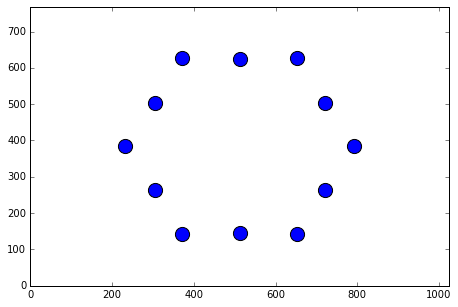

In [106]:
matplotlib.rcParams['figure.figsize'] = (7.5, 5.0)

allx = [512,652,720,792,720,652,512,372,305,232,305,372]
ally = [624,627,504,384,265,142,144,142,264,384,504,627]

plt.scatter(allx,ally,s=200)
plt.xlim(0,1024)
plt.ylim(0,768)
plt.show()
